# Nuage de point 2D d'une image couleur ?

In [1]:
import numpy as np
import skimage.io as io
from skimage.transform import rescale
import matplotlib.pyplot as plt
from skimage.filters import gaussian

In [2]:
src = io.imread('originals/superman.png') / 255 # https://upload.wikimedia.org/wikipedia/commons/0/05/Superman_S_symbol.svg
N = len(src)
print(N)
print(src.max())

100
0.9333333333333333


In [3]:
colors = [[.2, .8, 0], [.6, .15, 0], [.8, .7, 0]]

n = np.arange(N)
x, y = np.meshgrid(n, n)

img = np.zeros((N,N,3))
for b in range(3):
    cdt1 = src < .2
    cdt2 = src < .6
    c0 = np.tile(colors[0][b],(N,N))
    c1 = np.tile(colors[1][b],(N,N))
    c2 = np.tile(colors[2][b],(N,N))
    img[:,:,b] = np.where(
        cdt1, c0, np.where(
            cdt2, c1, c2 ) )
    
img += np.random.normal(loc=0, scale=0.1, size=img.shape)

img = gaussian(img, sigma=2)

img += np.random.normal(loc=0, scale=0.1, size=img.shape)
img = np.clip(img, 0, 1)

/home/miv/mazet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


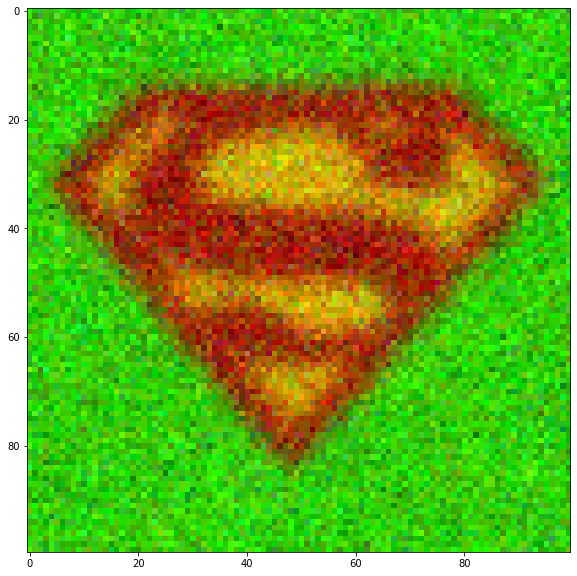

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# io.imsave('lightningx.png', img)

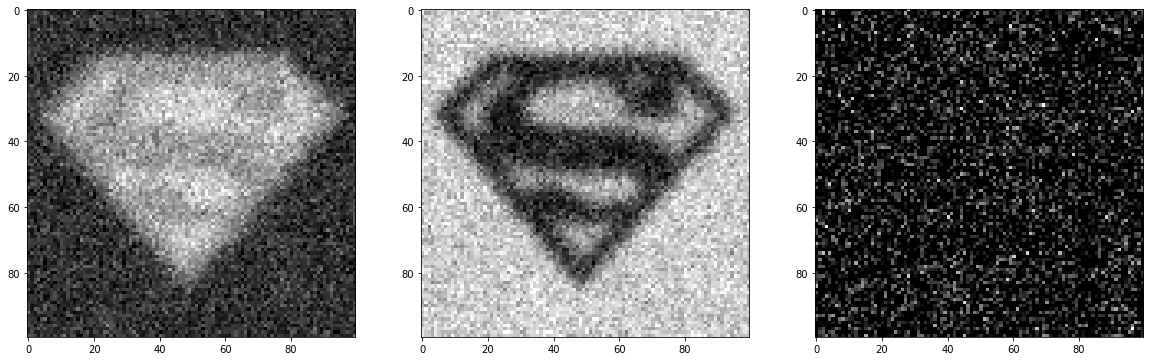

In [5]:
fig, axs = plt.subplots(1,3,figsize=(20,10))
axs[0].imshow(img[:,:,0], cmap="gray")
axs[1].imshow(img[:,:,1], cmap="gray")
axs[2].imshow(img[:,:,2], cmap="gray")
plt.show()

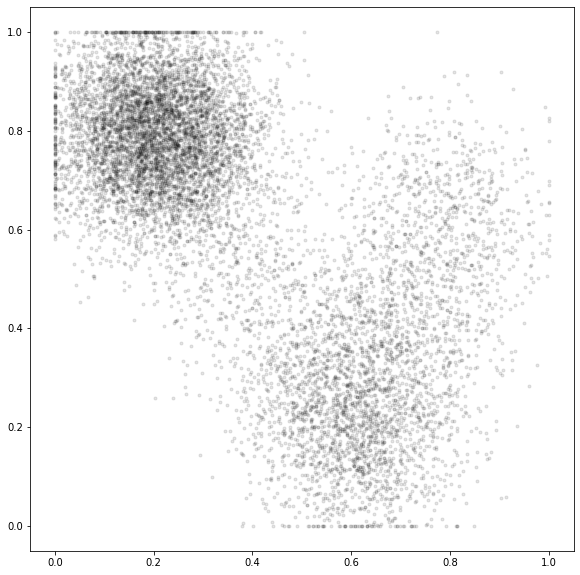

In [6]:
r = np.ravel(img[:,:,0])
g = np.ravel(img[:,:,1])
b = np.ravel(img[:,:,2])
gig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.scatter(r, g, marker='.', c='k', alpha=.1)
# ax.set_xlabel("vert")
# ax.set_ylabel("bleu")
ax.set_aspect('equal')
plt.show()

# K-Means

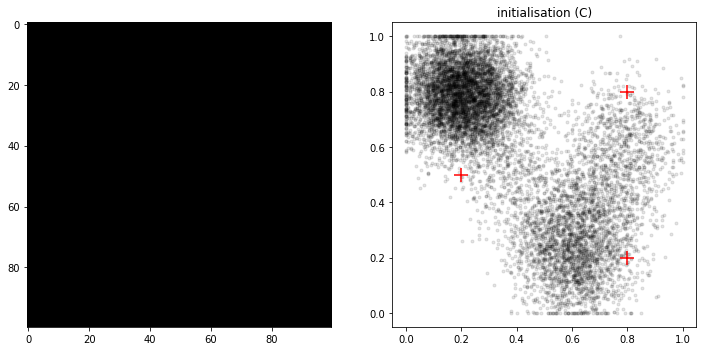

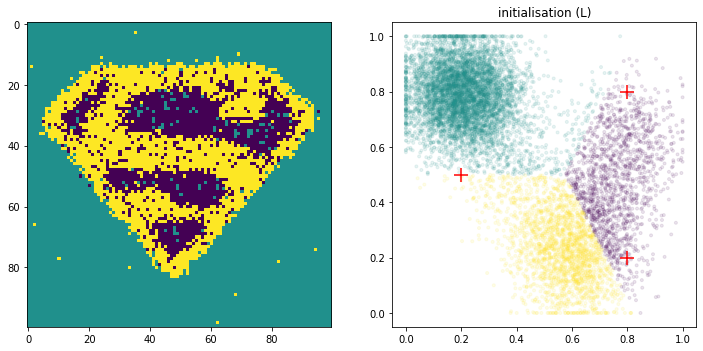

[[0.22236866 0.7528424 ]
 [0.64118367 0.24957778]
 [0.71936549 0.67386772]]


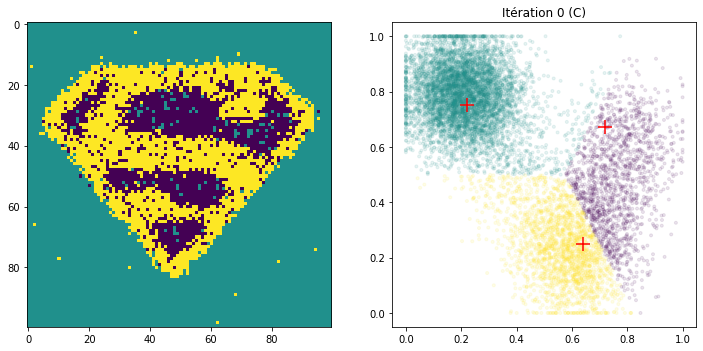

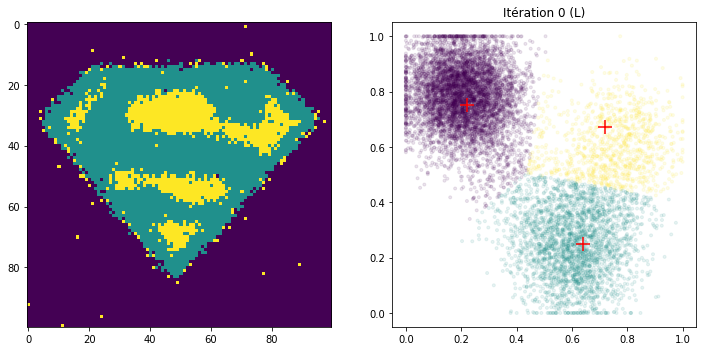

[[0.21019847 0.78225861]
 [0.60720334 0.2519769 ]
 [0.74542235 0.61082352]]


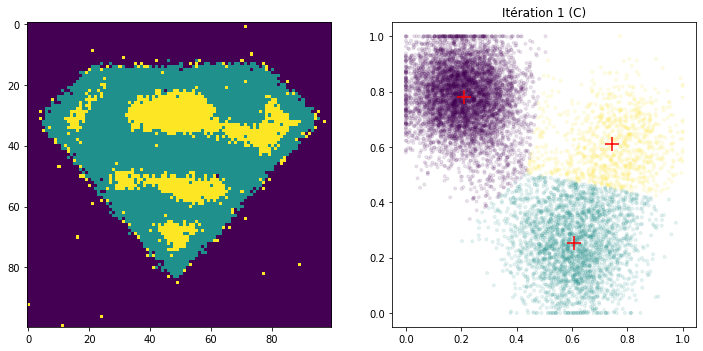

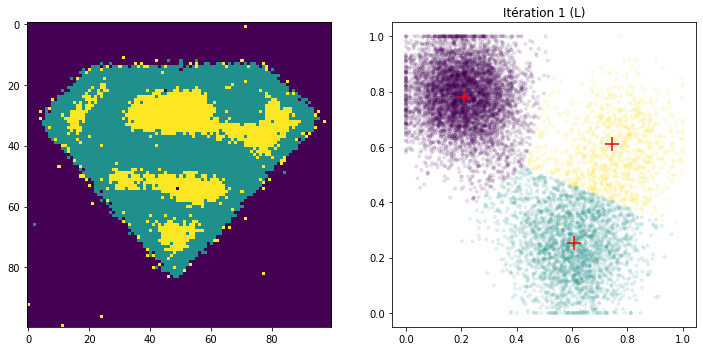

[[0.20954496 0.78438562]
 [0.59568792 0.24621304]
 [0.74898976 0.58661375]]


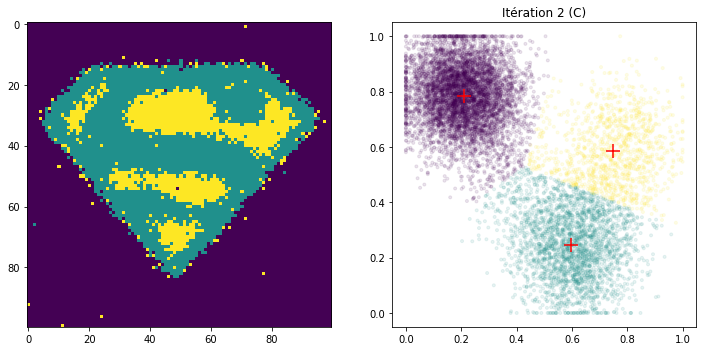

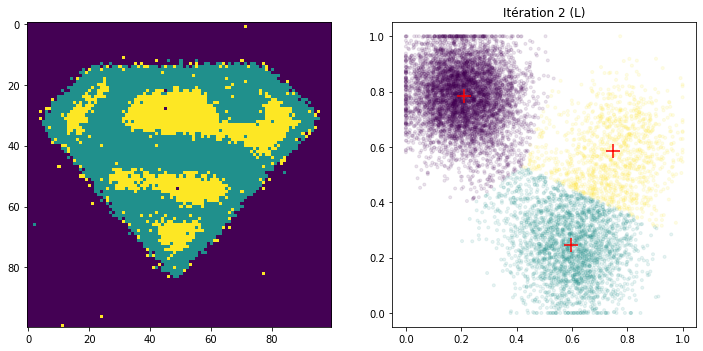

[[0.20962132 0.78463216]
 [0.59205266 0.24160518]
 [0.74653006 0.57430614]]


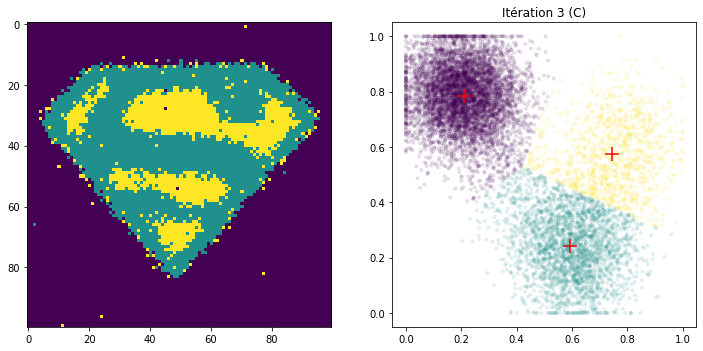

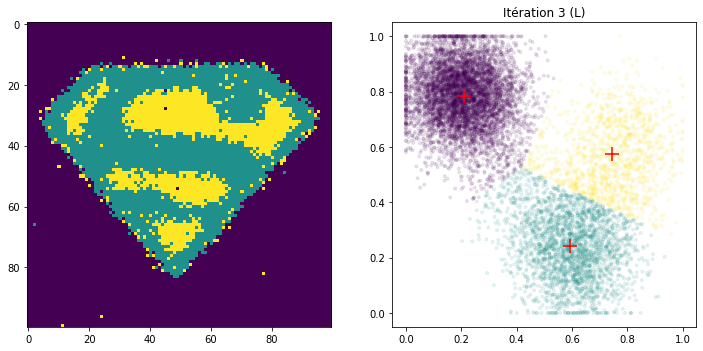

In [18]:
from sklearn.cluster import KMeans

num = 0

def display(X, labels, C, title):
    fig, axs = plt.subplots(1,2, figsize=(12, 6), facecolor='w')
    
    if len(labels)==1:
        axs[0].imshow(img*0)
    else:
        labeled_image = np.reshape(labels, img.shape[:2])
        axs[0].imshow(labeled_image)
    
    axs[1].scatter(X[:,0], X[:,1], marker='.', c=labels, alpha=.1)
    axs[1].scatter(C[:,0], C[:,1], marker='+', c='r', s=200)
#     axs[1].set_xlabel("vert")
#     axs[1].set_ylabel("bleu")
    axs[1].set_aspect('equal')
    axs[1].set_title(title)
    
    global num
    num +=1
    plt.savefig(f"kmeans-{num}.png")
    
    plt.show()

# Initialisation
X = np.array([r, g]).T
N = X.shape[0]
centroids = np.array([[.2, .5],[.8, .2],[.8, .8]])

delta0 = X-np.tile(centroids[0,:], (N,1))
delta1 = X-np.tile(centroids[1,:], (N,1))
delta2 = X-np.tile(centroids[2,:], (N,1))

dist0 = np.linalg.norm(delta0, axis=1)
dist1 = np.linalg.norm(delta1, axis=1)
dist2 = np.linalg.norm(delta2, axis=1)

labels0 = np.where((dist0>dist1) * (dist0>dist2), 0, 0)
labels1 = np.where((dist1>dist0) * (dist1>dist2), 1, 0)
labels2 = np.where((dist2>dist0) * (dist2>dist1), 2, 0)
labels = labels0 + labels1 + labels2

fig = display(X, 'k', centroids, "initialisation (C)")

fig = display(X, labels, centroids, "initialisation (L)")

# Itérations
for i in range(4):
    
    kmeans = KMeans(n_clusters=3, init=centroids, n_init=1, max_iter=1).fit(X)
    centroids = kmeans.cluster_centers_
    print(centroids)
    fig = display(X, labels, centroids, f"Itération {i} (C)")
    
    labels = kmeans.labels_
    fig = display(X, labels, centroids, f"Itération {i} (L)")
